In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/AI_study/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Features
- Pregnacies : 임신 횟수
- Glucose: 혈당 수치
- BloodPressure: 혈압 (mm Hg)
- SkinThickness: 피부 두께 (mm)
- Insulin: 인슐린 수치 (mu U/ml)
- BMI (Body Mass Index): 체질량 지수
- DiabetesPedigreeFunction: 당뇨병 유전력 함수
- Age: 나이
- Outcome: 당뇨병 여부 (0 or 1) - label


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# 데이터 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

C:\Users\yc_hur\AppData\Local\Temp\ipykernel_29516\4103535089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x="Outcome", palette=["#1f77b4", "#ff7f0e"])


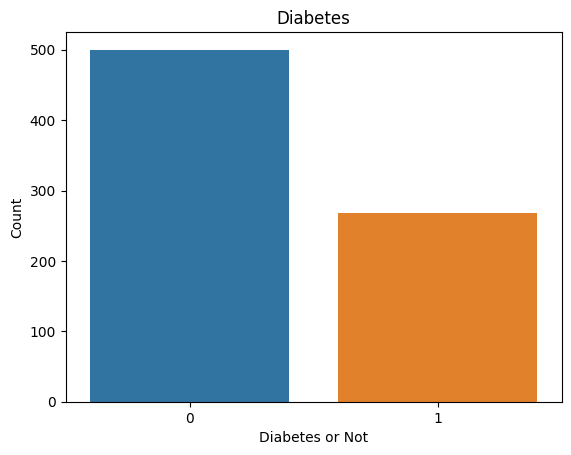

In [7]:
# Outcome 개수 시각화
sns.countplot(data = df, x="Outcome", palette=["#1f77b4", "#ff7f0e"])
plt.xlabel("Diabetes or Not")
plt.ylabel("Count")
plt.title("Diabetes")

plt.show()

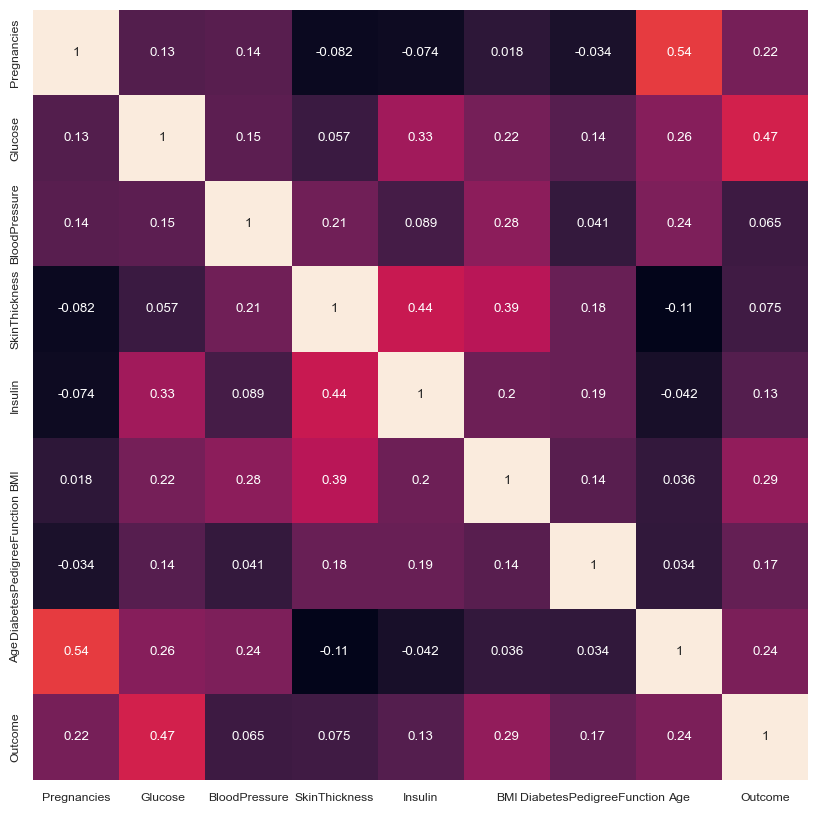

In [8]:
#상관관계 히트맵 생성
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

## Class인 Outcome과 높은 상관 관계를 맺는 features
- Pregnancies(0.22)
- Glucose(0.47)
- BMI(0.29)
- Age(0.24)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

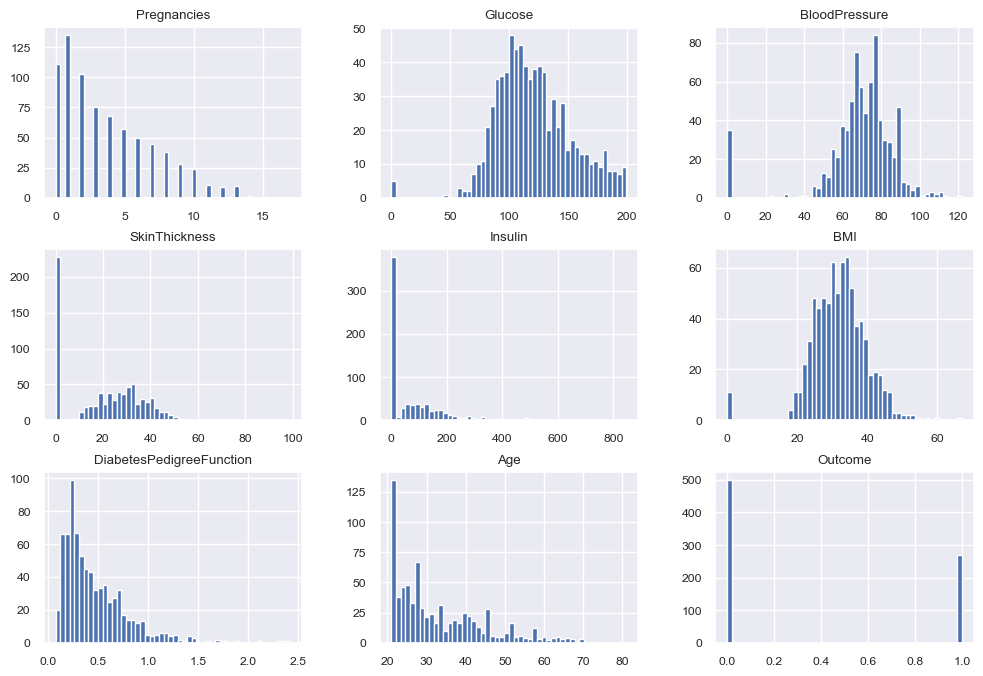

In [9]:
df.hist(bins=50, figsize=(12, 8))

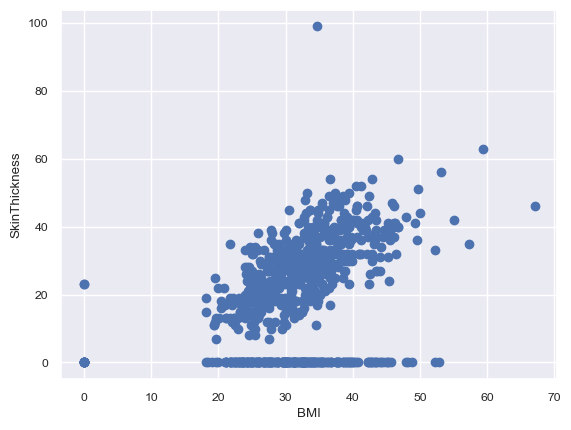

In [10]:
# BMI와 SkinThickness 관계
plt.scatter(df['BMI'], df['SkinThickness'])
plt.xlabel('BMI')
plt.ylabel('SkinThickness')

plt.show()

In [11]:
# 각 열에서 0인 값의 개수를 확인
zero_values_count = (df == 0).sum()

# 결과 출력
print(zero_values_count)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


#### Glucose(혈당 수치), BloodPressure(혈압), SkinThickness(피부 두께), Insulin(인슐린 수치), BMI(체질량 지수)가 0 값이 나오는 것은 이상치로 판단

In [12]:
# 이상치의 개수가 적은 Glucose, BloodPressure, BMI의 경우 이상치 제거
print("제거 전 데이터 개수: ", len(df))
df = df[(df['Glucose'] != 0) & 
        (df['BloodPressure'] != 0) & 
        (df['BMI'] != 0)]
print("제거 후 데이터 개수: ", len(df))

제거 전 데이터 개수:  768
제거 후 데이터 개수:  724


42개의 데이터 제거

Skin Thickness, BMI의 경우 이상치를 가진 데이터가 많고, 이상치를 제외하면 정규 분포를 따르기 때문에 평균값으로 대체

In [13]:
# 평균에 0인 값이 포함되면 평균치가 달라지므로 0인 값을 NaN으로 대체한 후 평균 계산후 대체
# SkinThickness와 Insulin의 0을 NaN으로 변경
df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].replace(0, np.nan)

# SkinThickness와 Insulin의 NaN 값을 평균값으로 대체
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

C:\Users\yc_hur\AppData\Local\Temp\ipykernel_29516\71297009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].replace(0, np.nan)
C:\Users\yc_hur\AppData\Local\Temp\ipykernel_29516\71297009.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
C:\Users\yc_hur\AppData\Local\Temp\ipykernel_29516\71297009.py:7: SettingWithCopyWarning: 
A value is trying to be set on a 

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.182331,156.056122,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.018907,87.395294,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,118.250000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.182331,156.056122,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,156.056122,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

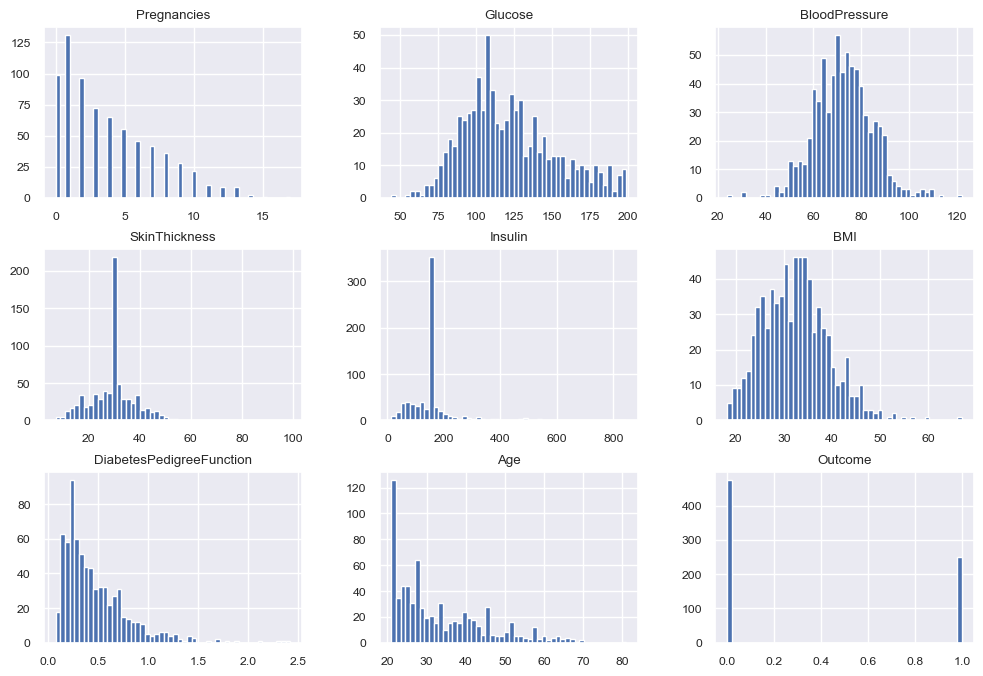

In [15]:
df.hist(bins=50, figsize=(12, 8))

In [16]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 724, dtype: int64

In [17]:
X = df.drop('Outcome', axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,156.056122,33.6,0.627,50
1,1,85,66,29.000000,156.056122,26.6,0.351,31
2,8,183,64,29.182331,156.056122,23.3,0.672,32
3,1,89,66,23.000000,94.000000,28.1,0.167,21
4,0,137,40,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63
764,2,122,70,27.000000,156.056122,36.8,0.340,27
765,5,121,72,23.000000,112.000000,26.2,0.245,30
766,1,126,60,29.182331,156.056122,30.1,0.349,47


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((579, 8), (145, 8), (579,), (145,))

In [19]:
# 표준화 StandardScaler 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

# 1. 하이퍼파라미터 범위 설정
param_dist = {
    'C': uniform(0.1, 10),      # C값을 0.1부터 10까지 랜덤으로 선택
    'gamma': uniform(0.01, 0.1),  # gamma 값을 0.01부터 0.1까지 랜덤으로 선택
    'kernel': ['linear', 'rbf', 'poly']  # 커널 종류
}

# 2. RandomizedSearchCV 설정
clf_svm = SVC(random_state=32)
random_search = RandomizedSearchCV(estimator=clf_svm, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# 모델 학습 및 랜덤 서치 수행
random_search.fit(train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", random_search.best_params_)

# 최적의 하이퍼파라미터로 평가된 평균 정확도 출력
print("최적의 정확도: ", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
최적의 하이퍼파라미터:  {'C': 0.5645041271999772, 'gamma': 0.07075448519014384, 'kernel': 'linear'}
최적의 정확도:  0.7736581709145428


In [21]:
from sklearn.model_selection import cross_val_score

# 3. 최적의 하이퍼파라미터로 모델 평가
best_clf_svm = random_search.best_estimator_

scores = cross_val_score(best_clf_svm, train_scaled, y_train, cv=5)

# 각 폴드에서의 성능 및 평균 성능 출력
print("교차 검증 성능 (각 폴드):", scores)
print("평균 성능:", scores.mean())

교차 검증 성능 (각 폴드): [0.80172414 0.75       0.81896552 0.77586207 0.72173913]
평균 성능: 0.7736581709145428


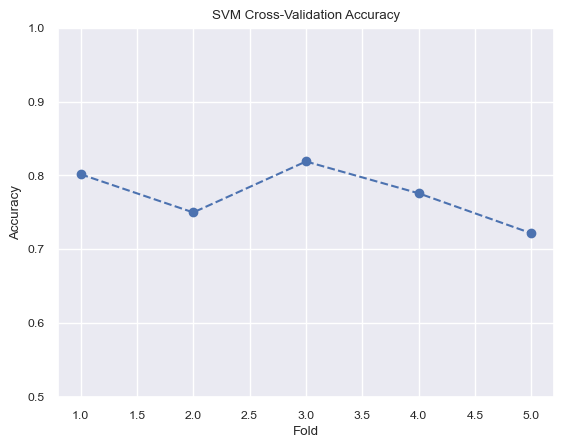

Mean accuracy across folds: 0.7736581709145428


In [22]:
# 교차 검증 결과 시각화
plt.plot(range(1, 6), scores, marker='o', linestyle='--')
plt.title('SVM Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.show()

# 평균 정확도 출력
print(f"Mean accuracy across folds: {scores.mean()}")

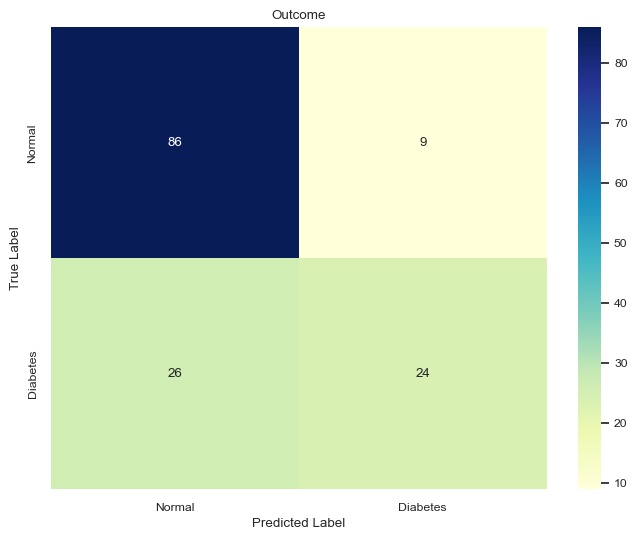


--- Decision Tree Classifier ---
Test Accuracy: 0.7586206896551724


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 혼동 행렬 계산 및 시각화
y_pred_svm = best_clf_svm.predict(test_scaled)
cm = confusion_matrix(y_test, y_pred_svm)

# 클래스 레이블 정의 (필요 시 클래스 레이블을 지정하세요)
LABELS = ['Normal', 'Diabetes']

# 혼돈 행렬 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS)
plt.title('Outcome')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 테스트 세트 정확도 출력
print("\n--- Decision Tree Classifier ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_svm)}")

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# 1. 하이퍼파라미터 범위 설정
param_dist = {
    'C': uniform(0.1, 10),  # C 값을 0.1부터 10까지 랜덤으로 선택
    'penalty': ['l1', 'l2', 'elasticnet', 'None'],  # 규제 종류
    'solver': ['newton-cg', 'lbfgs', 'saga'],  # 최적화 방법 선택 (l1과 elasticnet은 saga만 가능)
    'max_iter': [100, 200, 300, 400, 500]  # 최대 반복 횟수 설정
}

# 2. RandomizedSearchCV 설정
clf_lr = LogisticRegression(random_state=32)
random_search = RandomizedSearchCV(estimator=clf_lr, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# 모델 학습 및 랜덤 서치 수행
random_search.fit(train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", random_search.best_params_)

# 최적의 하이퍼파라미터로 평가된 평균 정확도 출력
print("최적의 정확도: ", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
최적의 하이퍼파라미터:  {'C': 6.1111501174320875, 'max_iter': 300, 'penalty': 'l2', 'solver': 'newton-cg'}
최적의 정확도:  0.7701949025487256


I:\anaconda3\envs\test01\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
185 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "I:\anaconda3\envs\test01\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "I:\anaconda3\envs\test01\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "I:\anaconda3\envs\test01\lib\site-packages\sklearn\linear_model\_logistic.py", line 1182, in fit
    raise ValueError("l1_ratio must be specified when penalty 

In [25]:
from sklearn.model_selection import cross_val_score

# 3. 최적의 하이퍼파라미터로 모델 평가
best_clf_lr = random_search.best_estimator_

# K-Fold 교차 검증 (K=5)
scores = cross_val_score(best_clf_lr, train_scaled, y_train, cv=5)

# 각 폴드에서의 성능 및 평균 성능 출력
print("교차 검증 성능 (각 폴드):", scores)
print("평균 성능:", scores.mean())

교차 검증 성능 (각 폴드): [0.81034483 0.75       0.80172414 0.77586207 0.71304348]
평균 성능: 0.7701949025487256


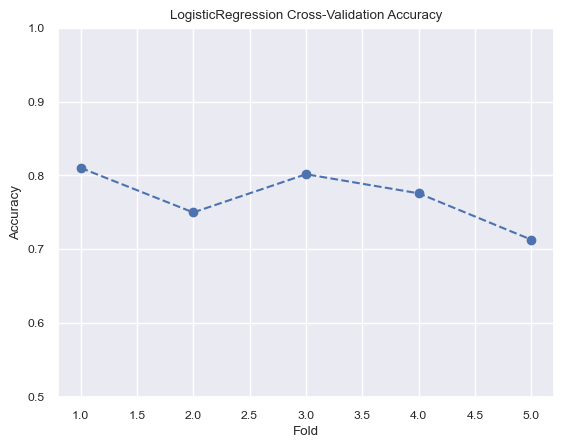

Mean accuracy across folds: 0.7701949025487256


In [26]:
# 교차 검증 결과 시각화
plt.plot(range(1, 6), scores, marker='o', linestyle='--')
plt.title('LogisticRegression Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.show()

# 평균 정확도 출력
print(f"Mean accuracy across folds: {scores.mean()}")

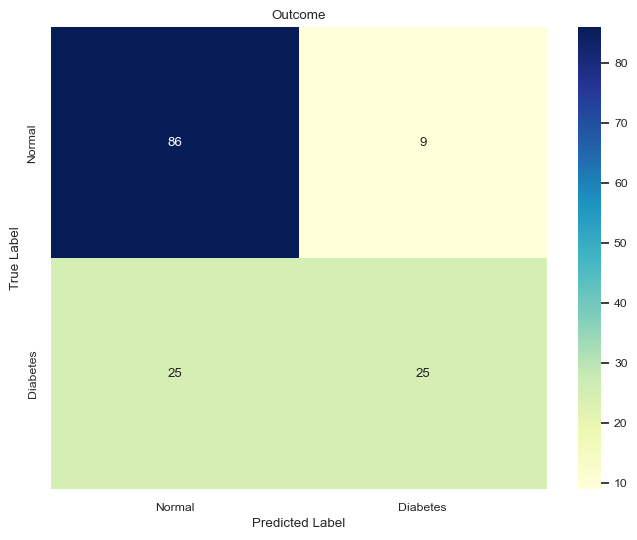


--- Decision Tree Classifier ---
Test Accuracy: 0.7655172413793103


In [27]:
# 혼동 행렬 계산 및 시각화
y_pred_lr = best_clf_lr.predict(test_scaled)
cm = confusion_matrix(y_test, y_pred_lr)

# 클래스 레이블 정의 (필요 시 클래스 레이블을 지정하세요)
LABELS = ['Normal', 'Diabetes']

# 혼돈 행렬 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS)
plt.title('Outcome')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 테스트 세트 정확도 출력
print("\n--- Decision Tree Classifier ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_lr)}")

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 하이퍼파라미터 범위 설정
param_dist = {
    'max_depth': randint(3, 11),           # 트리 최대 깊이를 3부터 10까지 랜덤으로 선택
    'min_samples_split': randint(2, 11),   # 노드를 분할하는 데 필요한 최소 샘플 수 (2부터 10까지)
    'min_samples_leaf': randint(1, 11)     # 리프 노드에 필요한 최소 샘플 수 (1부터 10까지)
}

# 2. RandomizedSearchCV 설정
clf_dt = DecisionTreeClassifier(random_state=32)
random_search = RandomizedSearchCV(estimator=clf_dt, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# 3. 모델 학습 및 랜덤 서치 수행
random_search.fit(train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", random_search.best_params_)

# 최적의 하이퍼파라미터로 평가된 평균 정확도 출력
print("최적의 교차 검증 정확도: ", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
최적의 하이퍼파라미터:  {'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 6}
최적의 교차 검증 정확도:  0.7477661169415292


In [29]:
# 4. 최적의 모델을 best_clf_dt로 저장하고 K-Fold 교차 검증 (K=5)
best_clf_dt = random_search.best_estimator_

scores = cross_val_score(best_clf_dt, train_scaled, y_train, cv=5)

# 각 폴드에서의 성능 및 평균 성능
print("교차 검증 성능 (각 폴드):", scores)
print("평균 교차 검증 성능:", scores.mean())

교차 검증 성능 (각 폴드): [0.75862069 0.73275862 0.79310345 0.75       0.70434783]
평균 교차 검증 성능: 0.7477661169415292


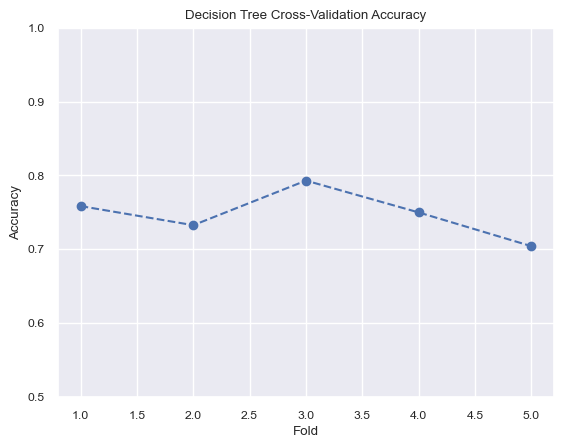

In [30]:
# 교차 검증 결과 시각화
plt.plot(range(1, 6), scores, marker='o', linestyle='--')
plt.title('Decision Tree Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.show()

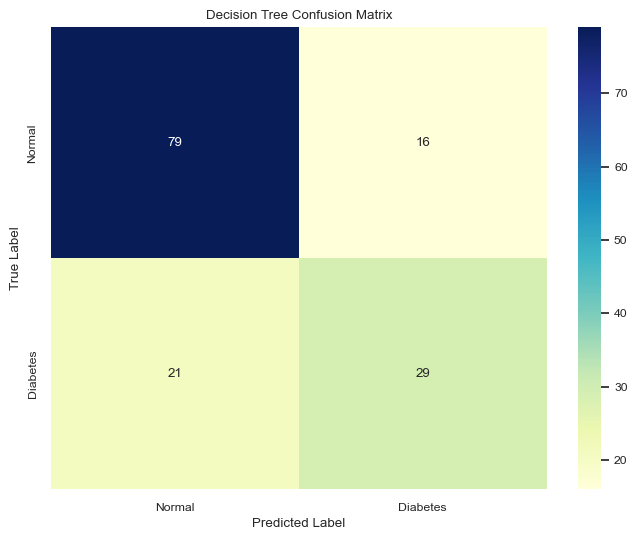


--- Decision Tree Classifier ---
Test Accuracy: 0.7448275862068966


In [31]:
# 테스트 데이터에 대한 예측
y_pred_dt = best_clf_dt.predict(test_scaled)

# 혼돈 행렬 계산 및 시각화
cm = confusion_matrix(y_test, y_pred_dt)

# 클래스 레이블 정의 (필요 시 클래스 레이블을 지정하세요)
LABELS = ['Normal', 'Diabetes']

# 혼돈 행렬 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 테스트 세트 정확도 출력
print("\n--- Decision Tree Classifier ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_dt)}")

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 하이퍼파라미터 범위 설정
param_dist = {
    'n_estimators': randint(50, 200),              # 트리 개수를 50부터 200까지 랜덤으로 선택
    'max_depth': randint(3, 20),                   # 트리의 최대 깊이를 3부터 20까지 랜덤으로 선택
    'min_samples_split': randint(2, 11),           # 노드를 분할하는 데 필요한 최소 샘플 수 (2부터 10까지)
    'min_samples_leaf': randint(1, 11),            # 리프 노드에 필요한 최소 샘플 수 (1부터 10까지)
    'bootstrap': [True, False]                     # 부트스트랩 방법 사용 여부
}

# 2. RandomizedSearchCV 설정
clf_rf = RandomForestClassifier(random_state=32)
random_search = RandomizedSearchCV(estimator=clf_rf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# 3. 모델 학습 및 랜덤 서치 수행
random_search.fit(train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", random_search.best_params_)

# 최적의 하이퍼파라미터로 평가된 평균 정확도 출력
print("최적의 교차 검증 정확도: ", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
최적의 하이퍼파라미터:  {'bootstrap': False, 'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 111}
최적의 교차 검증 정확도:  0.780584707646177


In [33]:
# 4. 최적의 모델을 best_clf_rf로 저장하고 K-Fold 교차 검증 (K=5)
best_clf_rf = random_search.best_estimator_
scores = cross_val_score(best_clf_rf, train_scaled, y_train, cv=5)

# 각 폴드에서의 성능 및 평균 성능
print("교차 검증 성능 (각 폴드):", scores)
print("평균 교차 검증 성능:", scores.mean())

교차 검증 성능 (각 폴드): [0.80172414 0.79310345 0.79310345 0.77586207 0.73913043]
평균 교차 검증 성능: 0.780584707646177


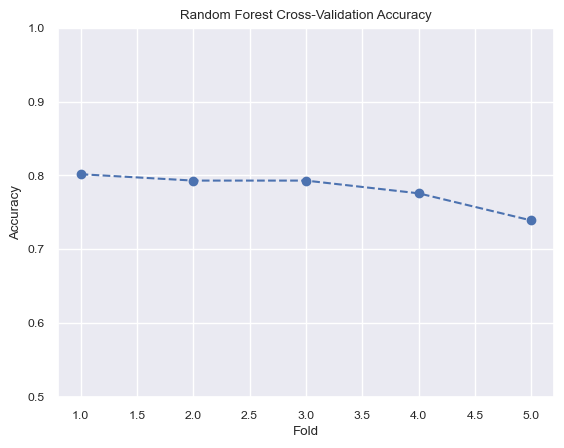

In [34]:
# 교차 검증 결과 시각화
plt.plot(range(1, 6), scores, marker='o', linestyle='--')
plt.title('Random Forest Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.show()

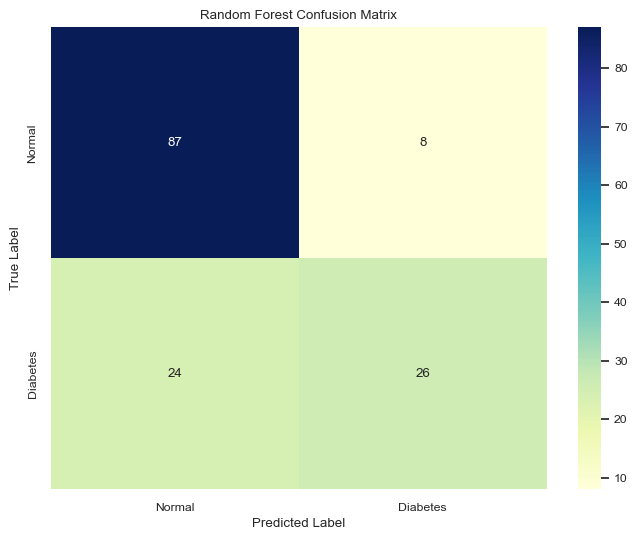


--- Random Forest Classifier ---
Test Accuracy: 0.7793103448275862


In [35]:
# 테스트 데이터에 대한 예측
y_pred_rf = best_clf_rf.predict(test_scaled)

# 혼돈 행렬 계산 및 시각화
cm = confusion_matrix(y_test, y_pred_rf)

# 클래스 레이블 정의 (필요 시 클래스 레이블을 지정하세요)
LABELS = ['Normal', 'Diabetes']

# 혼돈 행렬 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 테스트 세트 정확도 출력
print("\n--- Random Forest Classifier ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_rf)}")